In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Classified Data', index_col=0)

In [4]:
# anonymized data
df.head()

# Our aim is to find groups within this data 

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
# Firstly, lets feature scale
from sklearn.preprocessing import StandardScaler
# create our standard scaler
scaler = StandardScaler()

In [9]:
# fit our scaler to our entire dataset, except our y
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# After fitting, perform our feature scaling on our data
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [17]:
# check if our dataset has indeed been scaled
# make a data frame out of our scaled features, naming the columns all except the target variable
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
#Make your train-test split split
from sklearn.cross_validation import train_test_split
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [47]:
#import and create our k-neared neighbors model
from sklearn.neighbors import KNeighborsClassifier
#specify the number of neighbros used to classiy a given point
knn = KNeighborsClassifier(n_neighbors= 6)
#fit our model to our training set
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [48]:
#get our knn model predictions
pred = knn.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [49]:
# Lets evaluate how well lour knn model dies
from sklearn.metrics import classification_report, confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, pred))
c_report = classification_report(y_test, pred)
print(c_report)
cm.head()

             precision    recall  f1-score   support

          0       0.93      0.95      0.94        93
          1       0.95      0.93      0.94       107

avg / total       0.94      0.94      0.94       200



,0,1
0,88,5
1,7,100


Not at all bad
Lets check 1-50 neighbor parameter errors (pseudo GridSearch)

In [51]:
error_rate = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    # average where predictions are not equal to test set
    error_rate.append(np.mean(pred != y_test))

6


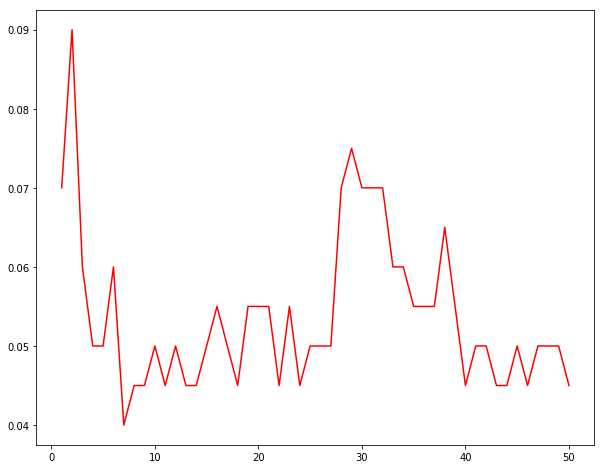

In [46]:
plt.figure(figsize=(10,8))
plt.plot(range(1,51), error_rate, color='red', ls='-')

errors = np.array(error_rate)
print(np.argmin(errors))
#seems like 6 is our lowest error n_neighbor value